In [11]:
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 

from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate, train_test_split

In [12]:
Plant_Dataset = pd.read_csv('Feature_Extracted_Plant_Dataset.csv')
Plant_Dataset.describe()

,Edge_Count,Re(Mean_Frequency),Im(Mean_Frequency),Frequency_Variance,StDev_Contrast,Mean_Noise,StDev_Noise,Minimum_Intensity,Maximum_Intensity
count,52803.000000,52803.000000,5.280300e+04,52803.000000,52803.000000,52803.000000,52803.000000,52803.000000,52803.000000
mean,441.175104,0.432590,-4.128050e-20,1043.109380,0.142318,0.476966,0.142318,0.085437,0.753024
std,190.125086,0.133243,2.009960e-17,301.178560,0.042527,0.071808,0.042527,0.062764,0.094796
min,0.000000,0.000848,-1.665335e-16,163.408944,0.029202,0.131723,0.029202,0.000000,0.367933
25%,289.000000,0.342362,-1.387779e-17,842.672999,0.111821,0.430708,0.111821,0.040853,0.688573
50%,420.000000,0.436709,0.000000e+00,1006.582372,0.140735,0.474295,0.140735,0.069160,0.758271
75%,581.000000,0.522776,1.387779e-17,1191.774667,0.169974,0.516459,0.169974,0.115961,0.820833
max,1569.000000,0.981226,1.110223e-16,3588.441038,0.363226,0.925371,0.363226,0.575310,1.000000


#### Correlation Heatmap ####

Text(0.5, 1.0, 'Heatmap of Correlation')

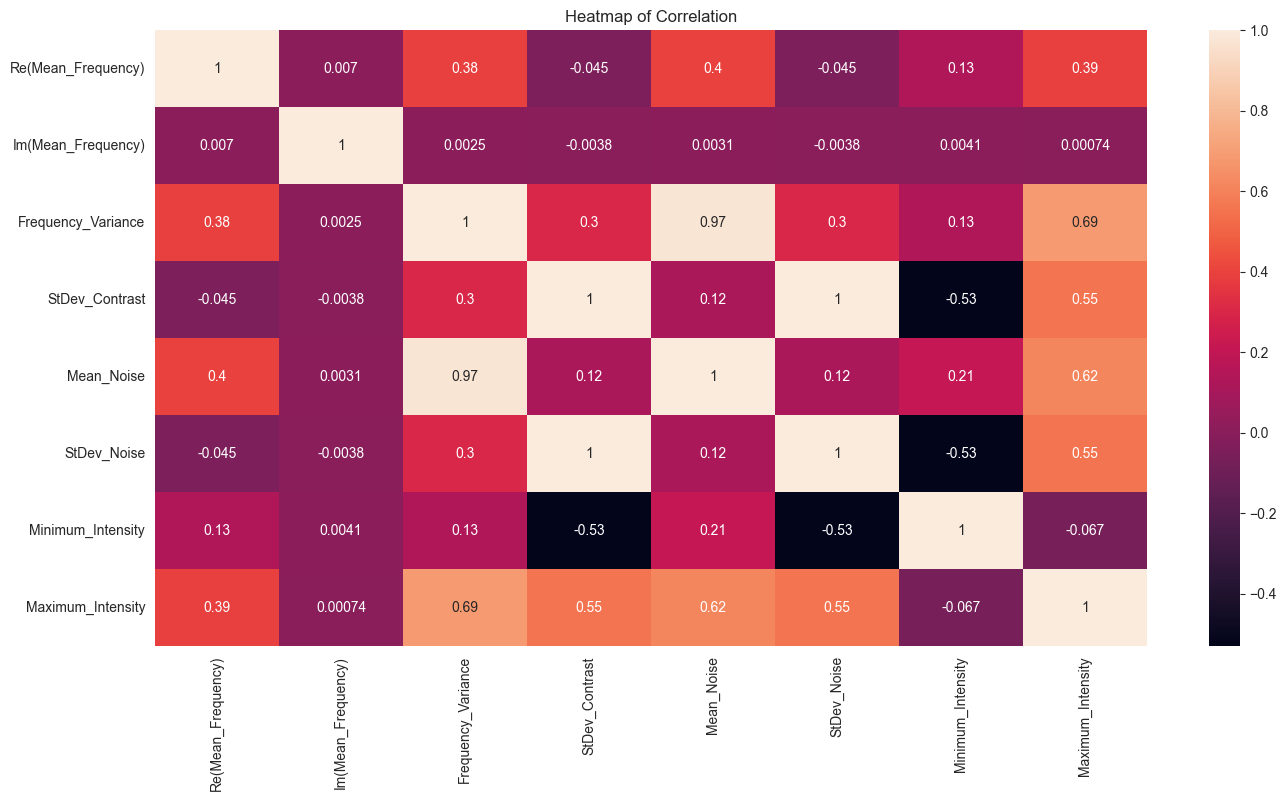

In [13]:
plt.figure(figsize=(16, 8))
sns.heatmap(Plant_Dataset.select_dtypes(['float64']).corr(), annot=True)
plt.title('Heatmap of Correlation')

#### Encode the **Disease** Feature ####

In [14]:
# print("Original features:\n", list(Plant_Dataset.columns), "\n")
# Plant_Dataset_dummies = pd.get_dummies(Plant_Dataset)
# print("Features after get_dummies:\n", list(Plant_Dataset_dummies.columns))

Original features:
 ['Edge_Count', 'Re(Mean_Frequency)', 'Im(Mean_Frequency)', 'Frequency_Variance', 'StDev_Contrast', 'Mean_Noise', 'StDev_Noise', 'Minimum_Intensity', 'Maximum_Intensity', 'Is_Healthy', 'Disease'] 

Features after get_dummies:
 ['Edge_Count', 'Re(Mean_Frequency)', 'Im(Mean_Frequency)', 'Frequency_Variance', 'StDev_Contrast', 'Mean_Noise', 'StDev_Noise', 'Minimum_Intensity', 'Maximum_Intensity', 'Is_Healthy', 'Disease_Apple_scab', 'Disease_Bacterial_spot', 'Disease_Black_rot', 'Disease_Cedar_apple_rust', 'Disease_Cercospora_leaf_spot Gray_leaf_spot', 'Disease_Common_rust', 'Disease_Early_blight', 'Disease_Esca_(Black_Measles)', 'Disease_Haunglongbing_(Citrus_greening)', 'Disease_Healthy', 'Disease_Late_blight', 'Disease_Leaf_Mold', 'Disease_Leaf_blight_(Isariopsis_Leaf_Spot)', 'Disease_Leaf_scorch', 'Disease_Northern_Leaf_Blight', 'Disease_Powdery_mildew', 'Disease_Septoria_leaf_spot', 'Disease_Spider_mites Two-spotted_spider_mite', 'Disease_Target_Spot', 'Disease_Toma

In [36]:
def plot_feature_importance(model):
    n_features = Plant_Dataset.shape[1] - 2
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), Plant_Dataset.drop(columns=['Disease', 'Is_Healthy']).columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

    model.feature_importances_

## Train to Identify Specific Disease ##

Accuracy on training set: 0.489
Accuracy on test set: 0.447


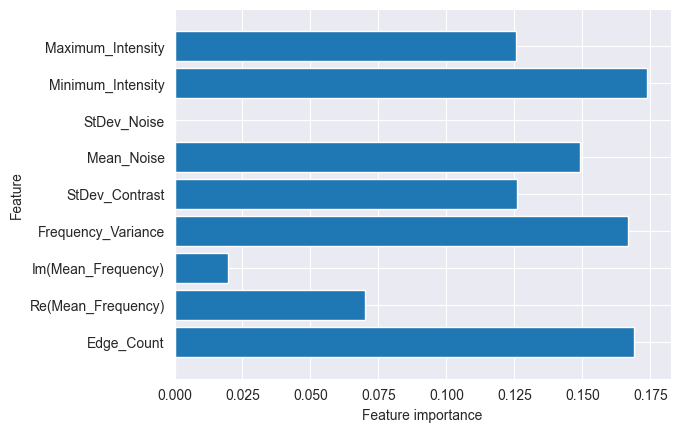

In [52]:
Label_Encoder = LabelEncoder()

X = Plant_Dataset.drop(columns=['Disease', 'Is_Healthy'])
Y = Plant_Dataset.Disease
Y = Label_Encoder.fit_transform(Y)

num_classes = len(Label_Encoder.classes_)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
XGBoost = XGBClassifier(n_estimators=64, max_depth=4, learning_rate=0.2).fit(X_train, Y_train)

print("Accuracy on training set: {:.3f}".format(XGBoost.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(XGBoost.score(X_test, Y_test)))

plot_feature_importance(XGBoost)

## Train to Detect Healthy vs Unhealthy ##

Accuracy on training set: 0.826
Accuracy on test set: 0.811


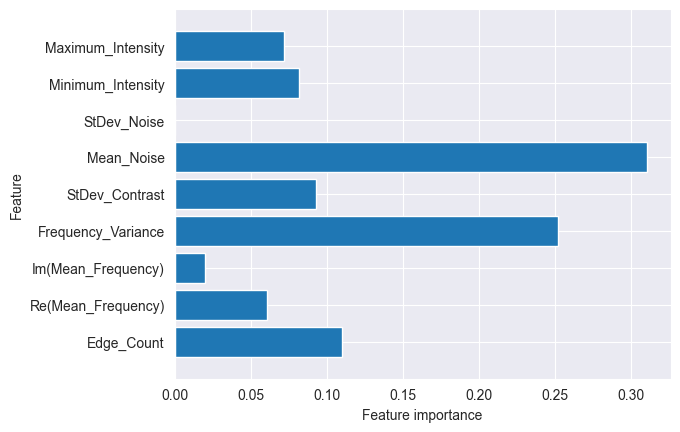

In [51]:
X = Plant_Dataset.drop(columns=['Disease', 'Is_Healthy'])
Y = Plant_Dataset.Is_Healthy

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
XGBoost = XGBClassifier(n_estimators=64, max_depth=5, learning_rate=0.2).fit(X_train, Y_train)

print("Accuracy on training set: {:.3f}".format(XGBoost.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(XGBoost.score(X_test, Y_test)))

plot_feature_importance(XGBoost)